In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split

In [ ]:
import os
os.chdir("C:\\Users\Ritwik Sinha\Desktop\Practical")

In [ ]:
train = pd.read_csv('titanic_train.csv')

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
#data analysis
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

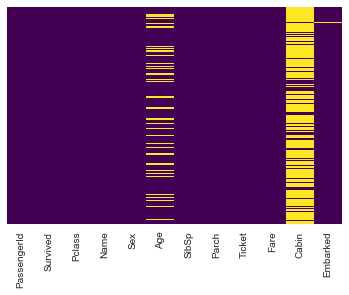

In [ ]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

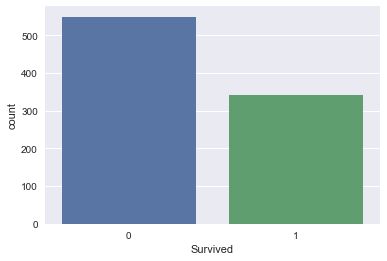

In [ ]:
sns.countplot(x='Survived',data=train)

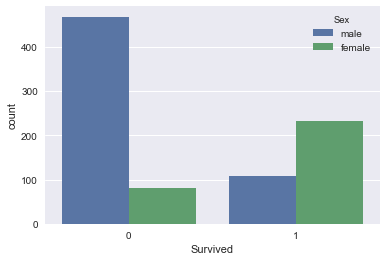

In [ ]:
sns.countplot(x='Survived',data=train,hue='Sex')

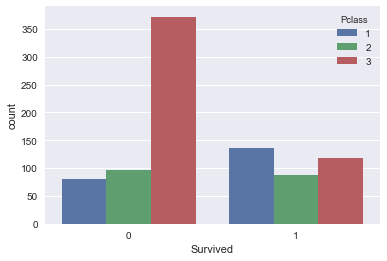

In [ ]:
sns.countplot(x='Survived',data=train,hue='Pclass')

In [ ]:
#data cleaning

train.groupby('Pclass')

In [ ]:
train.groupby('Pclass').mean()['Age'].round()

Pclass
1    38.0
2    30.0
3    25.0
Name: Age, dtype: float64

In [ ]:
mean_class1 = train.groupby('Pclass').mean()['Age'].round().loc[1]
mean_class2 = train.groupby('Pclass').mean()['Age'].round().loc[2]
mean_class3 = train.groupby('Pclass').mean()['Age'].round().loc[3]

In [ ]:
train.loc[train['Pclass']==1,'Age'] = train.loc[train['Pclass']==1,'Age'].fillna(value=mean_class1)
train.loc[train['Pclass']==2,'Age'] = train.loc[train['Pclass']==2,'Age'].fillna(value=mean_class2)
train.loc[train['Pclass']==3,'Age'] = train.loc[train['Pclass']==3,'Age'].fillna(value=mean_class3)

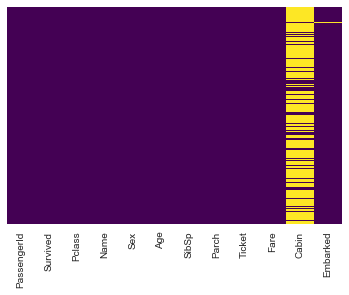

In [ ]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
train.drop('Cabin',axis=1,inplace=True)

In [ ]:
train.dropna(inplace=True)

In [ ]:
sex = pd.get_dummies(train['Sex'],drop_first=True)

In [ ]:
embark = pd.get_dummies(train['Embarked'],drop_first=True)

In [ ]:
train = pd.concat([train,sex,embark],axis=1)

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1


In [ ]:
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [ ]:
train.drop('PassengerId',axis=1,inplace=True)

In [ ]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [ ]:
test = pd.read_csv('test_titanic_f.csv')

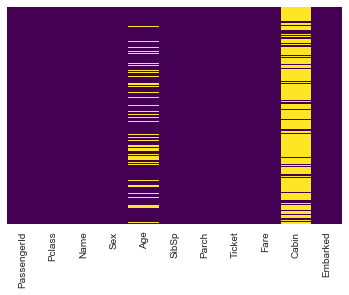

In [ ]:
sns.heatmap(test.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
test.drop('Cabin',axis=1,inplace=True)

In [ ]:
test.dropna(inplace=True)

In [ ]:
test.loc[test['Pclass']==1,'Age'] = test.loc[test['Pclass']==1,'Age'].fillna(value=mean_class1)
test.loc[test['Pclass']==2,'Age'] = test.loc[test['Pclass']==2,'Age'].fillna(value=mean_class2)
test.loc[test['Pclass']==3,'Age'] = test.loc[test['Pclass']==3,'Age'].fillna(value=mean_class3)

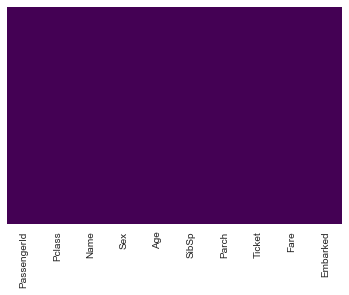

In [ ]:
sns.heatmap(test.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
sex = pd.get_dummies(test['Sex'],drop_first=True)
embark = pd.get_dummies(test['Embarked'],drop_first=True)

In [ ]:
test = pd.concat([test,sex,embark],axis=1)

In [ ]:
test.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [ ]:
test.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,892,3,34.5,0,0,7.8292,1,1,0
1,893,3,47.0,1,0,7.0000,0,0,1
2,894,2,62.0,0,0,9.6875,1,1,0
3,895,3,27.0,0,0,8.6625,1,0,1
4,896,3,22.0,1,1,12.2875,0,0,1


In [ ]:
#training

X = train.drop('Survived',axis=1)
y = train['Survived']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [ ]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [ ]:
y_predict = logmodel.predict(X_test)

In [ ]:
y_predict

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1], dtype=int64)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_predict)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_predict)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_predict)
print("Accuracy:",result2)

Confusion Matrix:
[[148  15]
 [ 36  68]]
Classification Report:
             precision    recall  f1-score   support

          0       0.80      0.91      0.85       163
          1       0.82      0.65      0.73       104

avg / total       0.81      0.81      0.80       267

Accuracy: 0.808988764045
